In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as  np

In [2]:
features = pd.read_csv('features.csv')

In [3]:
features.columns

Index(['avnn', 'hr', 'SDNN', 'pNN50', 'RMSSD', 'HRdiff', 'VLF', 'LF', 'HF',
       'LHFratio', 'Record'],
      dtype='object')

In [4]:
annotations = pd.read_csv('ecg_annotations.csv')

In [5]:
annotations.head()

,Record,Length minutes,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,Sex,height (cm),weight (kg)
0,a01,490,20,470,9,12.5,57.1,69.6,51,M,175,102
1,a02,529,109,420,9,57.2,12.3,69.5,38,M,180,120
2,a03,520,274,246,9,38.4,0.7,39.1,54,M,168,80
3,a04,493,40,453,9,73.4,4.0,77.4,52,M,173,121
4,a05,455,179,276,8,35.0,6.0,41.0,58,M,176,78


In [71]:
df.hist??

if AHI is greater than 5, patient is considered apneic. 
Create new column label for  apneic or healthy based on this threshold

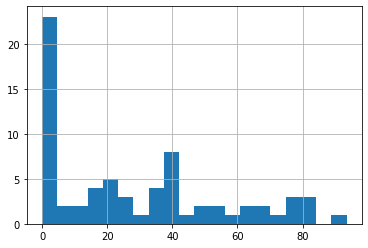

In [73]:
annotations['AHI'].hist(bins=20)

It appears  that there are many patients  with "severe" apnea, (more than  8 hours with > 5 minutes of observed apnea)

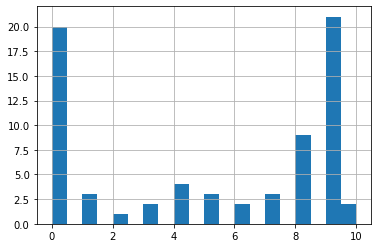

In [76]:
annotations['hours w/apnea'].hist(bins=20)

In [79]:
conditions = [
    (df['AHI'] >5), 
    (df['AHI'] <= 5)]
values = [1,0]  # 1 mean the patient have apnea
#add the new column
df['apneic'] = np.select(conditions, values)

In [80]:
df

,avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,...,apnea minutes,hours w/apnea,AI,HI,AHI,Age,Sex,height (cm),weight (kg),apneic
0,773.210689,78.212799,58.146878,29.844961,27.497005,157.004831,8.970510e+02,5.927678e+02,394.691116,1.501852,...,57,4,21.0,12.0,33.0,40,M,179,96,1
1,816.050695,81.297207,174.104971,64.893617,94.327233,817.407758,3.421633e+03,8.270484e+03,3087.869897,2.678378,...,0,0,0.0,0.0,0.0,42,M,180,64,0
2,1710.571827,82.843089,10387.294675,74.860335,8147.339311,666.399227,6.930619e+07,7.766709e+05,36173.134257,21.470932,...,0,0,0.0,0.0,0.0,31,M,170,66,0
3,729.207451,82.827238,48.530037,3.581871,27.266419,163.353500,4.430518e+02,2.851670e+02,209.107968,1.363731,...,453,9,73.4,4.0,77.4,52,M,173,121,1
4,983.773399,61.248142,63.614407,42.209073,34.918897,26.923077,1.698403e+03,7.090731e+02,210.398408,3.370145,...,100,6,11.0,10.0,21.0,58,M,176,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,861.555748,76.313205,89.967072,20.847751,32.612594,5942.307692,1.353910e+03,8.611401e+02,393.548053,2.188145,...,73,4,22.0,2.0,24.0,53,M,176,85,1
66,1089.027073,139.262476,4581.704473,80.169492,3575.626400,665.912424,3.695730e+07,2.660973e+06,417537.801368,6.373010,...,2,0,0.0,0.0,0.0,27,M,184,72,0
67,1039.785789,58.761388,133.861154,71.129707,72.403088,40.389395,4.536033e+03,4.428413e+03,1506.599890,2.939343,...,383,8,17.3,37.4,54.7,51,M,175,102,1
68,682.619536,88.589922,55.763385,8.749146,22.138723,157.004831,9.322601e+02,6.524076e+02,226.456254,2.880943,...,209,7,27.3,10.4,37.7,46,M,167,69,1


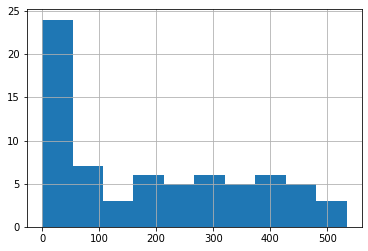

In [69]:
annotations['apnea minutes'].hist()

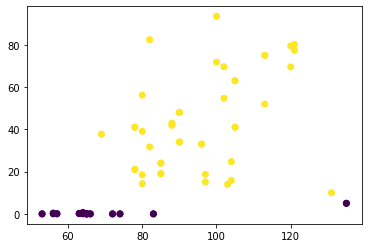

In [84]:
plt.scatter(df['weight (kg)'],df['AHI'],  c=df['apneic'])

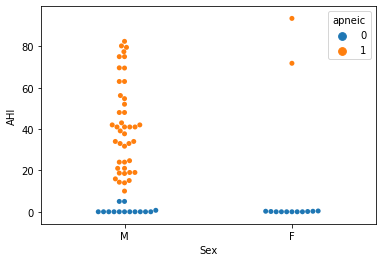

In [85]:
sns.swarmplot(df['Sex'], df['AHI'], hue=df['apneic'])

In [37]:
df = pd.merge(features,annotations, on='Record')

In [47]:
df.corr()

,avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,Length minutes,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,height (cm),weight (kg)
avnn,1.000000,-0.103776,0.984679,0.106108,0.987314,-0.031674,0.964856,0.984235,0.948749,0.133791,0.087326,-0.003983,0.019626,0.096379,0.059088,-0.083342,0.023195,0.081814,-0.177746,-0.069493
hr,-0.103776,1.000000,0.044370,0.572188,0.031503,0.388300,0.094269,-0.004484,0.049018,0.342802,-0.225747,0.329231,-0.340598,-0.447525,-0.236419,-0.213148,-0.279852,-0.414007,0.207969,-0.213870
SDNN,0.984679,0.044370,1.000000,0.186829,0.999728,0.031599,0.992094,0.984271,0.960865,0.209622,0.057642,0.045000,-0.030332,0.031411,0.022661,-0.109349,-0.017585,0.014589,-0.160635,-0.100344
pNN50,0.106108,0.572188,0.186829,1.000000,0.175896,0.233301,0.224500,0.129500,0.157473,0.244531,-0.340317,0.463299,-0.483444,-0.606191,-0.405136,-0.193243,-0.420702,-0.521520,0.155467,-0.384179
RMSSD,0.987314,0.031503,0.999728,0.175896,1.000000,0.020258,0.991847,0.986988,0.963226,0.200764,0.059537,0.039981,-0.025424,0.038026,0.026793,-0.107452,-0.013319,0.021097,-0.164909,-0.096012
HRdiff,-0.031674,0.388300,0.031599,0.233301,0.020258,1.000000,0.015621,-0.015066,-0.001120,0.014401,-0.050966,-0.002037,-0.007491,-0.070875,0.105421,-0.080952,0.064564,-0.053192,0.180947,0.055737
VLF,0.964856,0.094269,0.992094,0.224500,0.991847,0.015621,1.000000,0.975984,0.964050,0.242488,0.016977,0.078846,-0.068548,-0.014610,-0.010678,-0.131556,-0.054362,-0.024621,-0.165107,-0.127950
LF,0.984235,-0.004484,0.984271,0.129500,0.986988,-0.015066,0.975984,1.000000,0.987630,0.127557,0.064397,0.018736,-0.005225,0.064759,0.043204,-0.098260,0.004189,0.057170,-0.147319,-0.067784
HF,0.948749,0.049018,0.960865,0.157473,0.963226,-0.001120,0.964050,0.987630,1.000000,0.115640,0.038560,0.043580,-0.032540,0.029235,0.018816,-0.112410,-0.021997,0.032703,-0.121886,-0.074932
LHFratio,0.133791,0.342802,0.209622,0.244531,0.200764,0.014401,0.242488,0.127557,0.115640,1.000000,0.015465,0.115105,-0.101778,-0.098833,-0.195689,-0.113765,-0.210197,-0.083405,-0.066456,-0.167021


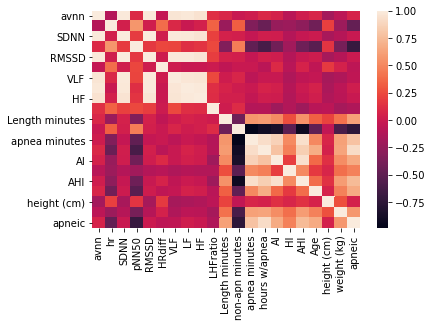

In [91]:
sns.heatmap(df.corr())

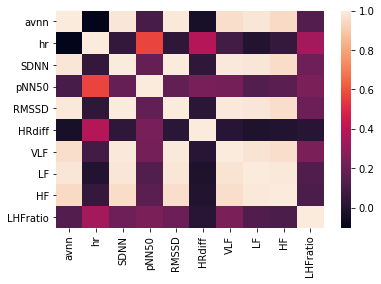

In [57]:
sns.heatmap(features.corr())

apnea minutes is strongly correlated with  AHI (this makes sense)
Age and weight are weakly correlated with AHI

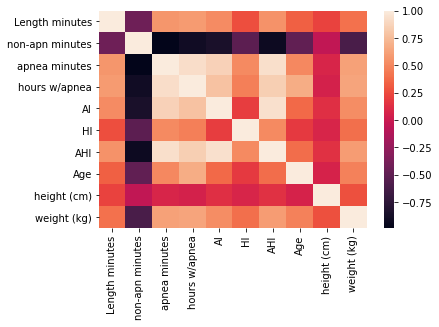

In [58]:
sns.heatmap(annotations.corr())

In [28]:
x_vars = ['avnn','hr','LHFratio']
y_vars = ['apnea minutes']

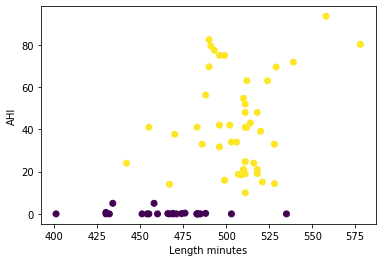

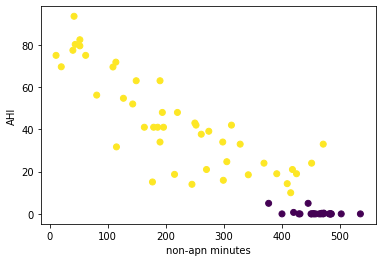

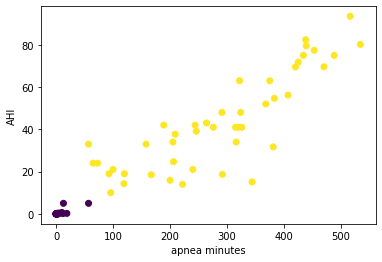

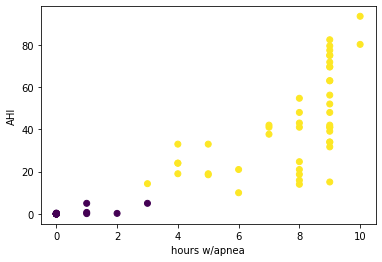

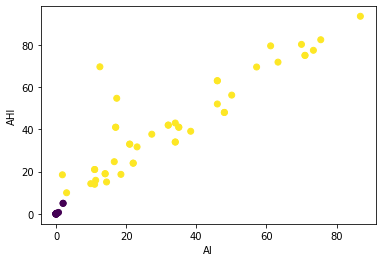

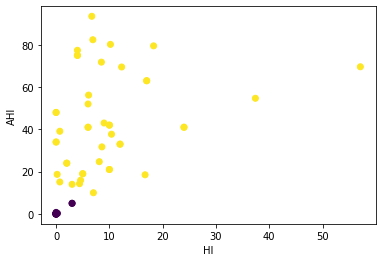

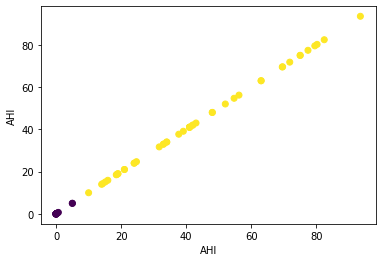

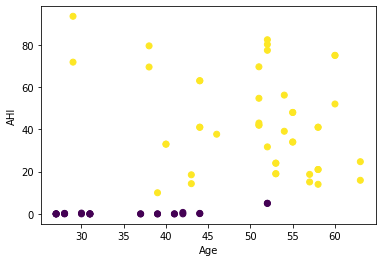

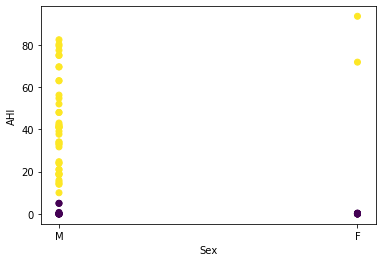

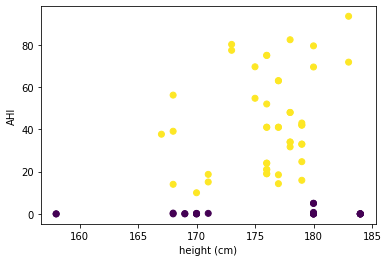

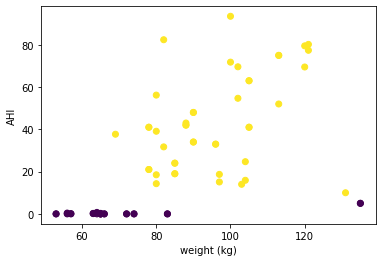

In [87]:
# skip_feat = ['Record',]
for feature in annotations.columns:
    if feature in 'Record':
        continue
    plt.scatter(df[feature],df['AHI'],c=df['apneic'])
    plt.xlabel(feature)
    plt.ylabel('AHI')
    plt.show()

There is a strong correlation between AHI an pnn50 when pnn50 is greater than 30.

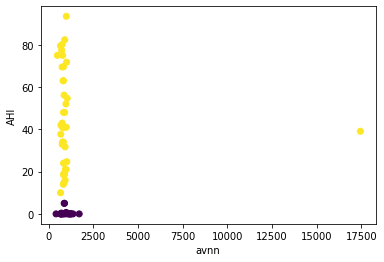

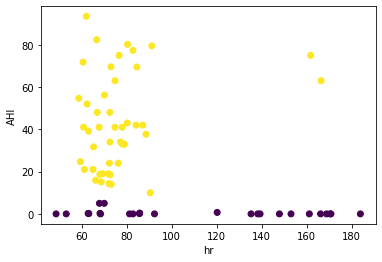

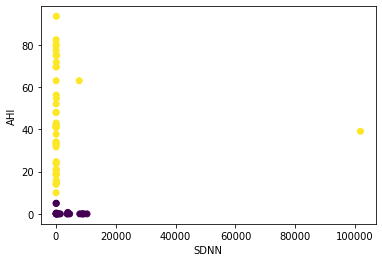

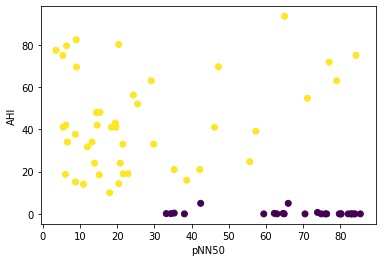

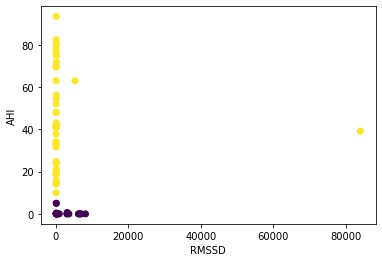

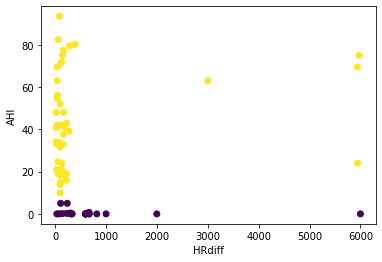

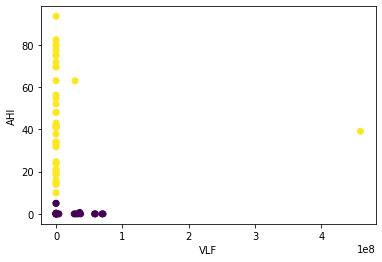

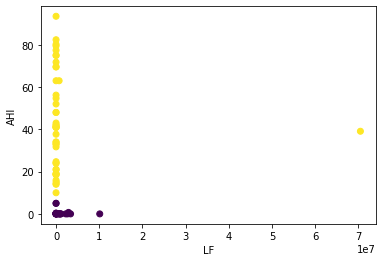

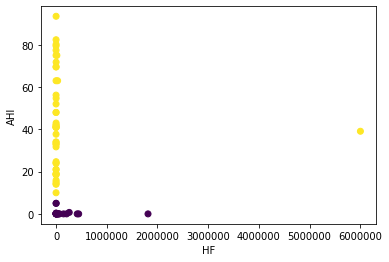

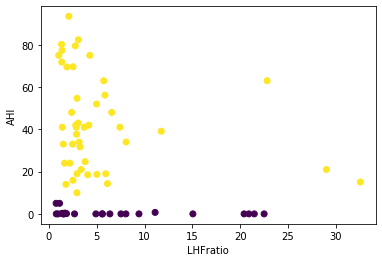

In [86]:
for feature in features.columns:
    if feature == 'Record':
        continue
    plt.scatter(df[feature],df['AHI'],c=df['apneic'])
    plt.xlabel(feature)
    plt.ylabel('AHI')
    plt.show()

(array([ 8., 28., 17.,  3.,  0.,  1.,  3.,  2.,  5.,  3.]),
 array([ 48.66886741,  62.18333542,  75.69780344,  89.21227145,
        102.72673947, 116.24120748, 129.7556755 , 143.27014351,
        156.78461153, 170.29907954, 183.81354756]),
 <a list of 10 Patch objects>)

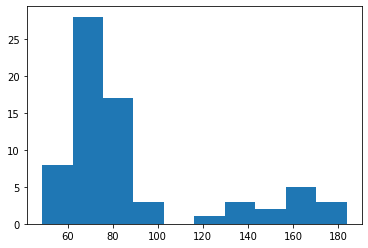

In [90]:
plt.hist(df['hr'])

Age,Height,weight,pnn50,HRdiff,LHFratio, all appear  to  be potentially discriminative features

We have chosen AHI as our threshold metric, and AI,HI,minutes (apnea  or not) and AHI is highly dependent on these features. Therefore we will not consider them in our hypothesis testing.

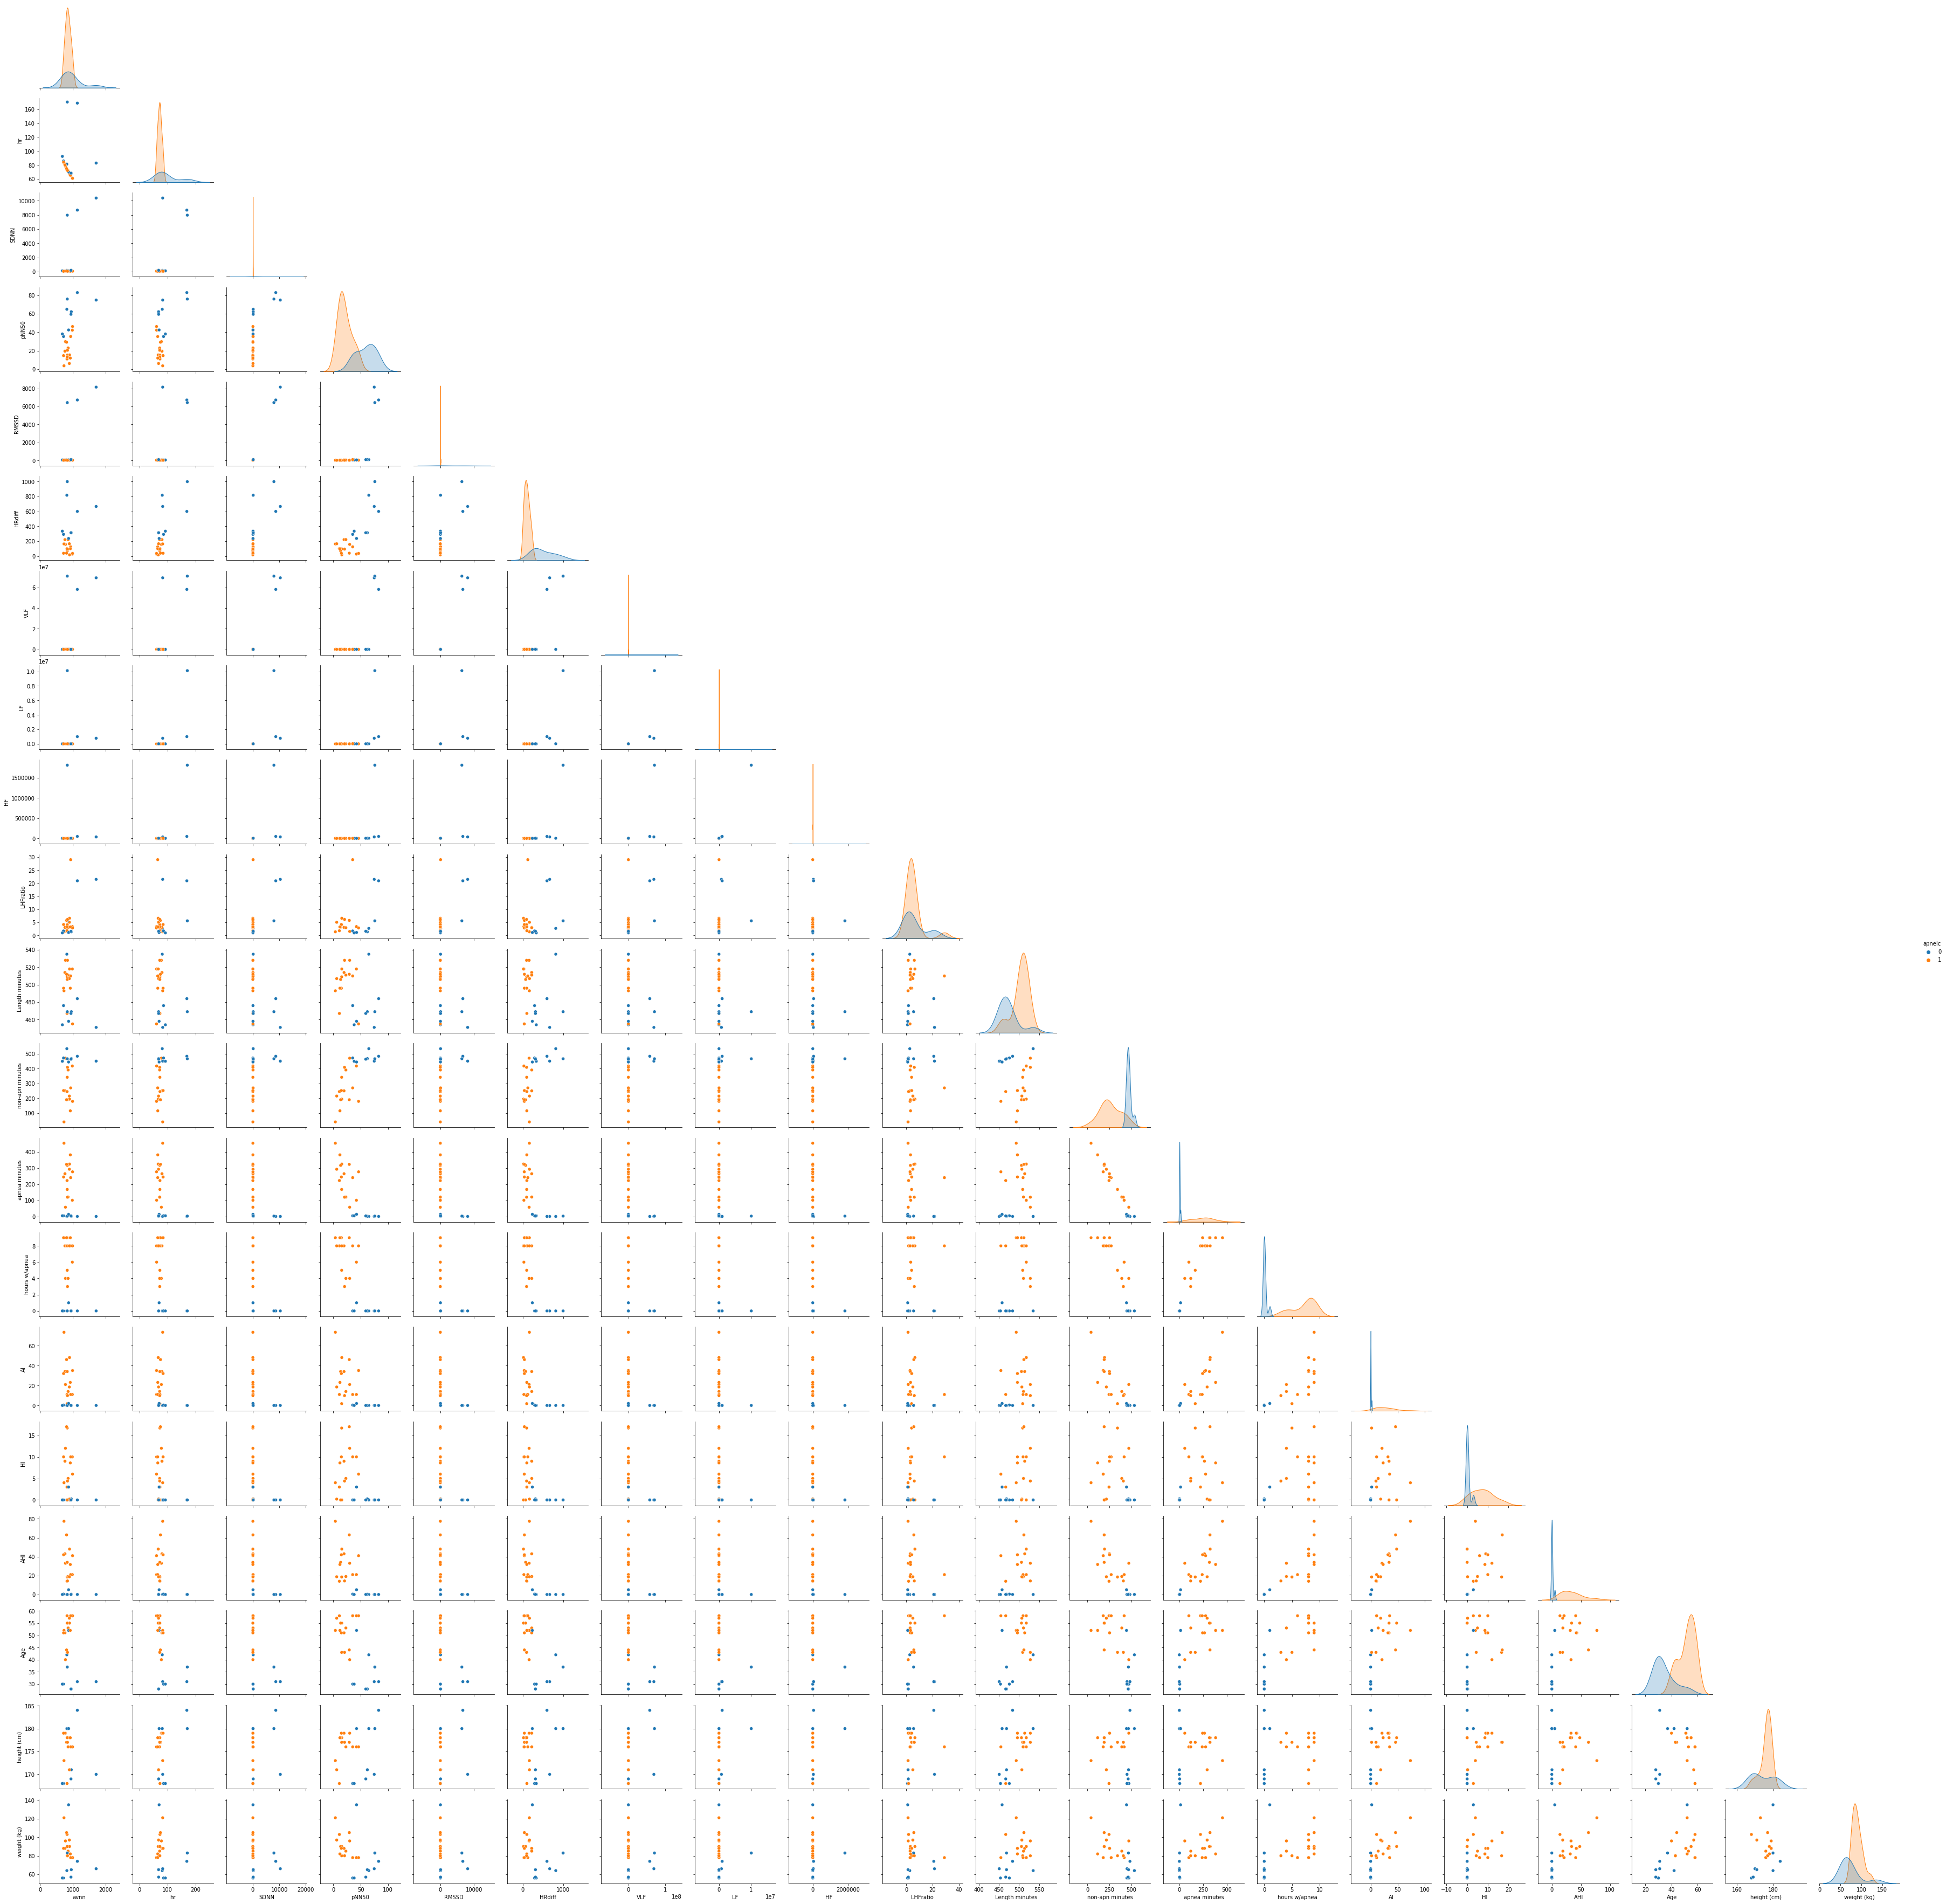

In [94]:
sns.pairplot(df.head(25),hue='apneic', corner=True)

In [95]:
df.columns

Index(['avnn', 'hr', 'SDNN', 'pNN50', 'RMSSD', 'HRdiff', 'VLF', 'LF', 'HF',
       'LHFratio', 'Record', 'Length minutes', 'non-apn minutes',
       'apnea minutes', 'hours w/apnea', 'AI', 'HI', 'AHI', 'Age', 'Sex',
       'height (cm)', 'weight (kg)', 'apneic'],
      dtype='object')

In [96]:
discriminative_features = ['pNN50','LHFratio','HRdiff','weight (kg)','Age']

In [104]:
res = stats.ttest_ind(healthy,apneic)

In [105]:
res.pvalue

1.882668389822424e-10

In [119]:
apneic = df[df['apneic']==1]
healthy = df[df['apneic']==0]

In [120]:
apneic.describe()

,avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,...,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,height (cm),weight (kg),apneic
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01,4.500000e+01,4.500000e+01,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0
mean,1203.885621,76.816179,2506.266567,26.584624,2024.523784,567.451485,1.084012e+07,1.584327e+06,1.348355e+05,5.225727,...,219.044444,287.333333,7.733333,33.880000,9.486667,43.366667,50.533333,176.088889,95.600000,1.0
std,2477.956059,20.838065,15176.422158,21.958313,12539.217897,1519.968613,6.845871e+07,1.050192e+07,8.944938e+05,6.615557,...,128.965985,132.063174,1.863525,22.290383,10.379889,22.718895,8.231315,3.697802,14.581121,0.0
min,488.181464,58.761388,32.960686,3.581871,13.125471,16.923077,2.197134e+02,2.357354e+02,3.274369e+01,1.029282,...,11.000000,57.000000,3.000000,1.800000,0.000000,10.000000,29.000000,167.000000,69.000000,1.0
25%,770.378086,66.706724,49.942762,10.955519,22.836830,45.454545,7.053835e+02,4.229810e+02,1.709509e+02,2.374275,...,115.000000,200.000000,7.000000,16.600000,4.000000,24.000000,44.000000,176.000000,85.000000,1.0
50%,831.513761,72.618290,63.614407,19.693301,30.672375,100.202429,9.587368e+02,8.575290e+02,2.818294e+02,3.055354,...,196.000000,292.000000,9.000000,32.000000,6.900000,41.000000,52.000000,177.000000,96.000000,1.0
75%,902.263300,79.009790,95.251734,35.327103,50.908555,165.618449,1.698403e+03,2.125542e+03,7.999389e+02,5.016933,...,305.000000,383.000000,9.000000,48.000000,10.400000,63.000000,57.000000,178.000000,105.000000,1.0
max,17441.346154,166.378184,101765.236602,84.177708,84112.241637,5976.284585,4.589937e+08,7.046431e+07,6.001843e+06,32.557475,...,471.000000,534.000000,10.000000,86.800000,57.100000,93.500000,63.000000,183.000000,131.000000,1.0


In [121]:
healthy.describe()

,avnn,hr,SDNN,pNN50,RMSSD,HRdiff,VLF,LF,HF,LHFratio,...,non-apn minutes,apnea minutes,hours w/apnea,AI,HI,AHI,Age,height (cm),weight (kg),apneic
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,...,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.0
mean,948.967573,111.416250,2661.280534,67.043619,2002.495448,734.225113,1.705033e+07,1.054040e+06,1.425393e+05,7.046567,...,460.20000,5.440000,0.320000,0.218400,0.254800,0.473200,35.44000,175.400000,70.840000,0.0
std,279.541182,45.148903,3581.692774,17.300348,2754.019475,1165.981674,2.484029e+07,2.147223e+06,3.707375e+05,7.343175,...,32.30454,11.814821,0.748331,0.558649,0.827995,1.372199,7.80534,8.025999,20.862007,0.0
min,415.305247,48.668867,68.331607,33.203883,45.767492,32.972973,5.205728e+02,9.106223e+02,4.216943e+02,0.752200,...,377.00000,0.000000,0.000000,0.000000,0.000000,0.000000,27.00000,158.000000,53.000000,0.0
25%,714.964209,68.421020,108.875951,62.237094,63.440338,291.085506,2.016416e+03,2.210678e+03,1.420382e+03,1.508631,...,450.00000,0.000000,0.000000,0.000000,0.000000,0.000000,28.00000,170.000000,63.000000,0.0
50%,942.660681,92.379021,324.193980,73.847803,158.203650,595.085995,6.406903e+03,8.270484e+03,9.588733e+03,4.909465,...,467.00000,1.000000,0.000000,0.000000,0.000000,0.000000,31.00000,180.000000,65.000000,0.0
75%,1136.410256,153.000701,3966.753588,80.169492,3099.035903,665.912424,3.268543e+07,1.002153e+06,6.962522e+04,9.412321,...,481.00000,4.000000,0.000000,0.120000,0.000000,0.130000,41.00000,180.000000,72.000000,0.0
max,1710.571827,183.813548,10387.294675,85.373781,8147.339311,5999.716727,7.093625e+07,1.011680e+07,1.813533e+06,22.498659,...,535.00000,57.000000,3.000000,2.000000,3.000000,5.000000,52.00000,184.000000,135.000000,0.0


In [122]:
from scipy import stats
for feature in discriminative_features:
    apneic = df[feature].loc[df['apneic'] == 1]
    healthy = df[feature].loc[df['apneic'] == 0]
    res = stats.ttest_ind(healthy,apneic, equal_var=True)
    print(feature)
    print(res)

pNN50
Ttest_indResult(statistic=7.936849893638328, pvalue=2.8536705812135758e-11)
LHFratio
Ttest_indResult(statistic=1.0608101091505233, pvalue=0.29252949634537145)
HRdiff
Ttest_indResult(statistic=0.4757739155908546, pvalue=0.6357604076493417)
weight (kg)
Ttest_indResult(statistic=-5.8169855915495265, pvalue=1.7705574520273503e-07)
Age
Ttest_indResult(statistic=-7.485332739929625, pvalue=1.882668389822424e-10)
